# Preliminary operations

In [1]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

# scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve

In [3]:
# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# import training data
df_data_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")

# get training values
X_train = df_data_train.values
y_train = df_info_train['emotion']

# import test data
df_data_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TEST_no_outliers.xlsx", index_col="Unnamed: 0")

# get test values
X_test = df_data_test.values
y_test = df_info_test['emotion']

In [6]:
# get training values
X_train_speech = df_data_train[df_info_train["vocal_channel"] == "speech"].values
y_train_speech = df_info_train.loc[df_info_train["vocal_channel"] == "speech", "emotion"].values

# get training values
X_train_song = df_data_train[df_info_train["vocal_channel"] == "song"].values
y_train_song = df_info_train.loc[df_info_train["vocal_channel"] == "song", "emotion"].values

In [7]:
#print(len(df_info_train))

#rows2remove = np.random.choice(df_info_train.index, len(df_info_train)//2, replace=False)

#print(len(rows2remove))
#rows2remove

In [8]:
rows2remove = [ 306, 1695,  124,  922,  295,  797, 1306,  716,  629, 1688, 1410,
        827, 1255, 1351,   19,  244,  433, 1216,  837, 1180,   16,  958,
        715,  774,   38,  236,  324, 1272, 1579,  161,  591,  143,  785,
         96,  758,  734, 1107,  285,  896, 1730,  262, 1441,  947, 1079,
        395, 1136,  208, 1596,  308, 1583, 1631,   23, 1168, 1103,  406,
       1584,  609,  299,  724,  286,  929,  238,  885,  139, 1581,  983,
       1651,   51,  857,  142,  269, 1169, 1554,  494,  873, 1187, 1662,
        985,  655,  123, 1303,  832, 1256, 1033, 1209, 1404,  846,  474,
       1552, 1577,  174,  332,  312, 1170,  496,  965, 1150,  137, 1001,
       1328, 1024, 1634,   50, 1563, 1406,  557, 1500, 1260,  735, 1536,
        913,  518,  505,  282, 1081,  628,  277,  541,  388,  509, 1304,
       1175,  757,  798, 1570, 1178, 1571,  215, 1616,  742, 1523, 1337,
        386,  855,  187,  843,   18, 1156,  915, 1293,  507, 1433,  348,
       1359, 1123,  813,  171,  830,  297,  754,  611,   39,  185, 1003,
        439,   14, 1664,  809,  704,  479,  428,  125,  666,  199, 1508,
        844,  824,   74,  585,  103,   93,   56,  300, 1343, 1611,  893,
        553,  575, 1428,  195,  930, 1211,   79, 1297, 1602,  391, 1764,
        994,  477,  112, 1076,  919,  159,  838, 1058,  828, 1380, 1407,
       1593,  568,  773,  317,  555, 1284,  232,  687,  589, 1034, 1678,
        658,   47,  803,  584,  472, 1629,  121, 1741,   65,  875,  166,
       1727,  134,  886, 1265, 1693, 1598,   68,    6,  540, 1102, 1468,
         86,   89,  749,  535, 1751, 1066,  747, 1305, 1550, 1546, 1748,
        887,  314,  806,  146,  267,  616,  847,   55,  599, 1724, 1402,
       1294, 1032,  577,  385,  106, 1436,  482,  995,  745, 1624,  283,
        248,  870, 1418, 1609,  399,  331, 1733,  515,  292,  417,  644,
        404,  622,  544, 1566, 1711, 1753, 1572,  480, 1247, 1770,  437,
        512,  105,  117, 1512,  260,  775,  361, 1373, 1356,   71,  133,
        485,  790,  712,  783, 1292, 1628, 1387, 1237,  943, 1316, 1762,
       1612, 1248,  736,  938, 1128,  777,  158,  258,  547,  964, 1220,
       1131, 1108, 1605,  845,  129, 1746,  818, 1575,   53,  310,  110,
        461, 1685, 1309, 1133, 1434, 1167,   57, 1511, 1266,  116,  596,
       1400,  502,  529,  233,   67,  131,  946,  689,  165,  202,  389,
         32,  865,  898,  264,  252,  881, 1228, 1601, 1087,  833, 1269,
       1195,  274,  320, 1395, 1382, 1207, 1335,  200, 1152,    0,  890,
       1179,  407, 1773,  825, 1332, 1532, 1442,  231,  612,  954, 1250,
        909, 1017,  661, 1157, 1194,  743, 1048,  950,  709,  149,  164,
         80, 1233,   37, 1639, 1028,  968,  290, 1443, 1006, 1295, 1390,
        305, 1480, 1064,  942,  268, 1504,  438,  128,  266,  460, 1190,
        594, 1098, 1573,   36,  115,  755, 1603,  224, 1417, 1147,  152,
       1285,  717, 1110, 1490, 1113, 1668,  928, 1126,  649, 1142,  405,
        493, 1510,  230, 1703,  349,  101, 1652,  276,  402, 1464,  760,
        296, 1176, 1738,  784,  465, 1330, 1757,  487, 1346,  720,  588,
       1506,   48,  119,  669,  564,  708,  226,  207,  425, 1318, 1012,
       1525,  318,  554, 1090,  607,  684, 1042, 1172, 1280, 1005, 1138,
       1357,  280, 1731,  700, 1486, 1706,  807, 1474,   73,  549,  866,
        464, 1320, 1431,  981,  431,  910,  436, 1268, 1344, 1421,  653,
        440,  905,    9,  816,  791,  223,  475,    1,  904,  469, 1772,
        273,  626, 1754,  867, 1429, 1725, 1184,  647,  772,   41,  971,
       1654,  503,  975,  889,  321,  190,  926, 1174,  225,  680, 1239,
        560, 1182,  251, 1561,  741, 1492, 1393,   44, 1011,  374, 1430,
       1173,  876, 1369, 1000, 1425, 1105,  639,  281, 1438, 1432,  478,
       1638, 1565, 1289, 1057,  536,  859,  393,  556,  432,  218, 1647,
       1101, 1070,  492,  463,  892,  122, 1342, 1254,  504, 1413,  138,
        695, 1621, 1391, 1023, 1580,   66, 1521, 1047, 1671,  795,   75,
       1578, 1755, 1229,  688,  630,  640, 1035,  765,  229, 1610,  850,
        242, 1010,  154, 1543,  562,  245, 1112, 1719,  590, 1165, 1460,
        313, 1339, 1388,  382,  140, 1002,  390,  831, 1649, 1275,  175,
       1595,   24, 1457, 1096,  701,  346, 1472, 1714, 1728,   42, 1736,
        730, 1454,  204,   13,  150, 1408,  970,  188, 1324,  739,  788,
        239, 1037,  637,  623, 1555, 1767,  367,  723, 1307,  532, 1670,
       1219, 1104,  377,  368,  355,  711,  697,  415,  576, 1050,  668,
        189, 1347,  884, 1750, 1591, 1440,  650,  357,  908,  963,  578,
       1137,  378, 1401,  337, 1665,  698,   85,  168,  241, 1765,  812,
        620,  624,  973,  581,  652,  665, 1286,  842,  350, 1258, 1723,
        325,  104, 1204, 1517, 1127,   77, 1018,  992,  342, 1109, 1210,
        672, 1279,  625,  176,  484,  307,  744,  413,  862, 1676, 1236,
       1077,  839, 1163,   84, 1456,  690, 1498, 1702, 1426, 1560, 1414,
        941, 1520, 1466, 1111,  787, 1162, 1099,   54, 1368,  869, 1267,
       1094,   95, 1203,  621,  566,  212, 1477, 1643,  685, 1334,  434,
       1227,  422,  423,  642, 1590,   99,  449, 1569, 1667,  879, 1515,
       1308, 1462, 1734,  582, 1191, 1375,  246,  691, 1587,  315,  359,
        213,  523,  811,  895,  633, 1188,  491, 1635,   43,  752, 1744,
       1502,  454, 1478,  210,  733, 1119,  160, 1424,  380,  722,  486,
        917, 1620,  148,  221,  900,  940,  897,  235,  113,  211, 1717,
        214,  984,  674, 1302,  272, 1080,  470, 1148, 1659,  362,  483,
       1640,  746,  453,  354, 1100,  254, 1213, 1198,  725, 1501,   90,
       1630,  769,  713,   10, 1338, 1729,  519, 1040, 1385,  182,  817,
       1063, 1534, 1073,   94,  598, 1092,  732,   20, 1707,  782,   97,
        430, 1143, 1594, 1071,  618, 1377,  278, 1518,  353,  467, 1559,
        525,  304,  114, 1242, 1221, 1144,  384, 1558, 1139, 1166,  671,
        645, 1124, 1467, 1409, 1217,  473, 1704, 1735, 1004]

# get new training dataset
df2_data_train = df_data_train.drop(index=rows2remove, axis=0)
df2_info_train = df_info_train.drop(index=rows2remove, axis=0)

# get training values
X_train_50 = df2_data_train.values
y_train_50 = df2_info_train['emotion']

# Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [32]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))

Accuracy 0.4269102990033223
F1-score [0.59030837 0.58378378 0.46666667 0.29487179 0.34196891 0.37681159
 0.33673469 0.29545455]
              precision    recall  f1-score   support

       angry       0.50      0.71      0.59        94
        calm       0.57      0.59      0.58        91
     disgust       0.50      0.44      0.47        48
     fearful       0.36      0.25      0.29        92
       happy       0.33      0.35      0.34        93
     neutral       0.57      0.28      0.38        46
         sad       0.32      0.35      0.34        94
   surprised       0.30      0.30      0.30        44

    accuracy                           0.43       602
   macro avg       0.43      0.41      0.41       602
weighted avg       0.43      0.43      0.42       602



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

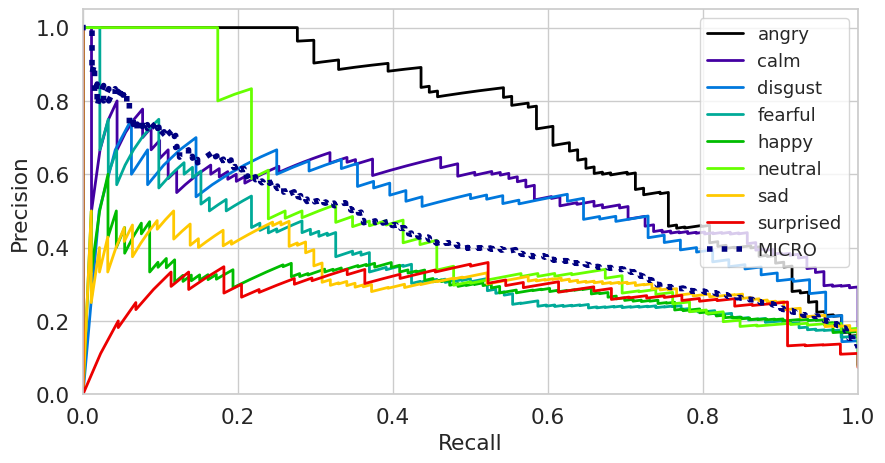

In [33]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("GB_Precision_Recall.svg", format="svg")
files.download("GB_Precision_Recall.svg")

In [34]:
predict_proba_dist = clf.decision_function(X_test)

In [35]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [36]:
pred_probability = []
for eachArr in predict_proba_dist:
    pred_probability.append(softmax(eachArr))

In [37]:
print('ROC-AUC %s' % roc_auc_score(y_test, pred_probability, multi_class="ovr"))

ROC-AUC 0.8345006456104578


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

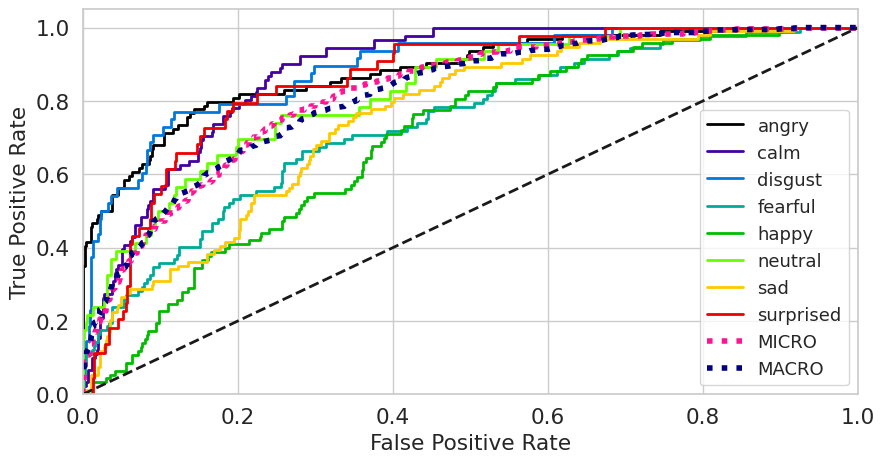

In [38]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test, 
    clf.decision_function(X_test),
    title=None
)
from google.colab import files
plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("GB_ROC.svg", format="svg")
files.download("GB_ROC.svg")

In [39]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [40]:
clf = HistGradientBoostingClassifier(learning_rate=1.0, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.21760797342192692
F1-score [0.29718876 0.02105263 0.         0.29255319 0.21126761 0.
 0.2254902  0.        ]
              precision    recall  f1-score   support

       angry       0.24      0.39      0.30        94
        calm       0.25      0.01      0.02        91
     disgust       0.00      0.00      0.00        48
     fearful       0.19      0.60      0.29        92
       happy       0.31      0.16      0.21        93
     neutral       0.00      0.00      0.00        46
         sad       0.21      0.24      0.23        94
   surprised       0.00      0.00      0.00        44

    accuracy                           0.22       602
   macro avg       0.15      0.18      0.13       602
weighted avg       0.18      0.22      0.16       602



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

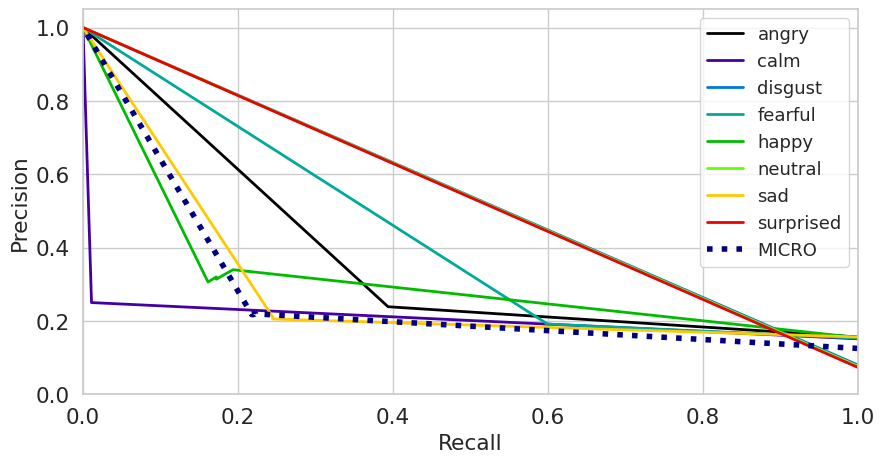

In [42]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("HGB_Precision_Recall.svg", format="svg")
files.download("HGB_Precision_Recall.svg")

In [43]:
predict_proba_dist = clf.decision_function(X_test)

In [44]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [45]:
pred_probability = []
for eachArr in predict_proba_dist:
    pred_probability.append(softmax(eachArr))

In [46]:
print('ROC-AUC %s' % roc_auc_score(y_test, pred_probability, multi_class="ovr"))

ROC-AUC 0.5316717837467024


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

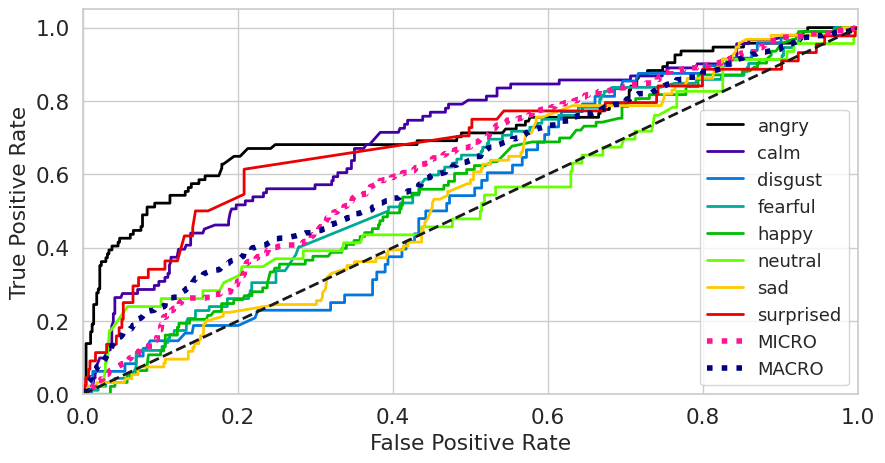

In [47]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test, 
    clf.decision_function(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("HGB_ROC.svg", format="svg")
files.download("HGB_ROC.svg")

# XGBoost

In [66]:
# https://xgboost.readthedocs.io/en/stable/python/python_intro.html

In [67]:
from xgboost import XGBClassifier

In [68]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

In [69]:
le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test = le.transform(y_test)

In [70]:
clf = XGBClassifier(objective='binary:logistic', 
                    max_depth = 6,
                    learning_rate = 1.0,
                    gamma = 0.0,
                    reg_lambda = 1,
                    tree_method='exact', # 'approx'
                    random_state=42,
                   )

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4003322259136213
F1-score [0.57740586 0.43786982 0.45833333 0.32467532 0.33684211 0.27777778
 0.34313725 0.275     ]
              precision    recall  f1-score   support

           0       0.48      0.73      0.58        94
           1       0.47      0.41      0.44        91
           2       0.46      0.46      0.46        48
           3       0.40      0.27      0.32        92
           4       0.33      0.34      0.34        93
           5       0.38      0.22      0.28        46
           6       0.32      0.37      0.34        94
           7       0.31      0.25      0.28        44

    accuracy                           0.40       602
   macro avg       0.39      0.38      0.38       602
weighted avg       0.40      0.40      0.39       602



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

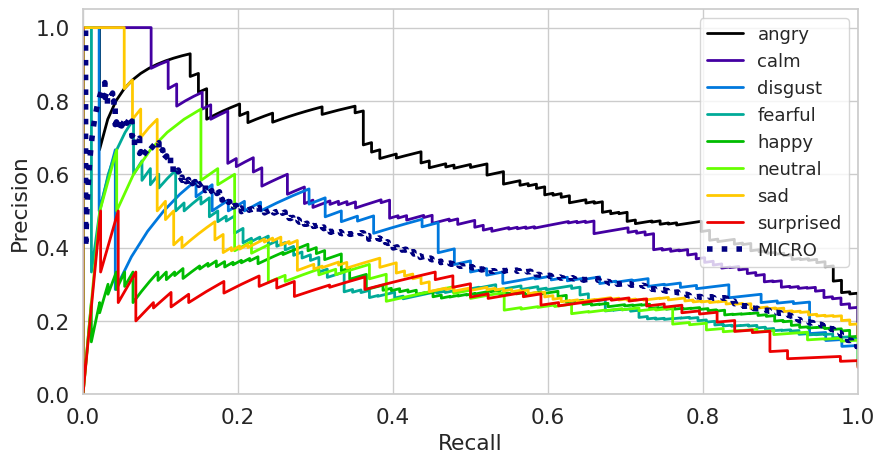

In [71]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("XGB_Precision_Recall.svg", format="svg")
files.download("XGB_Precision_Recall.svg")

In [72]:
predict_proba_dist = clf.predict_proba(X_test)

In [73]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [74]:
pred_probability = []
for eachArr in predict_proba_dist:
    pred_probability.append(softmax(eachArr))

In [75]:
print('ROC-AUC %s' % roc_auc_score(y_test, pred_probability, multi_class="ovr"))

ROC-AUC 0.7632738914767907


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

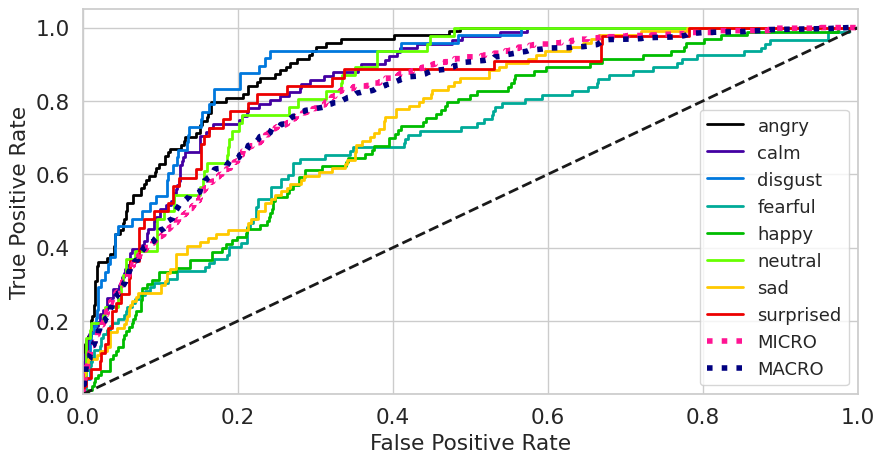

In [76]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("XGB_ROC.svg", format="svg")
files.download("XGB_ROC.svg")

# LightGBM

In [48]:
# https://lightgbm.readthedocs.io/en/latest/Python-Intro.html

In [49]:
from lightgbm import LGBMClassifier

In [50]:
clf = LGBMClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.4318936877076412
F1-score [0.60262009 0.52910053 0.48484848 0.3625     0.35294118 0.3030303
 0.33497537 0.31818182]
              precision    recall  f1-score   support

       angry       0.51      0.73      0.60        94
        calm       0.51      0.55      0.53        91
     disgust       0.47      0.50      0.48        48
     fearful       0.43      0.32      0.36        92
       happy       0.39      0.32      0.35        93
     neutral       0.50      0.22      0.30        46
         sad       0.31      0.36      0.33        94
   surprised       0.32      0.32      0.32        44

    accuracy                           0.43       602
   macro avg       0.43      0.41      0.41       602
weighted avg       0.43      0.43      0.42       602



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

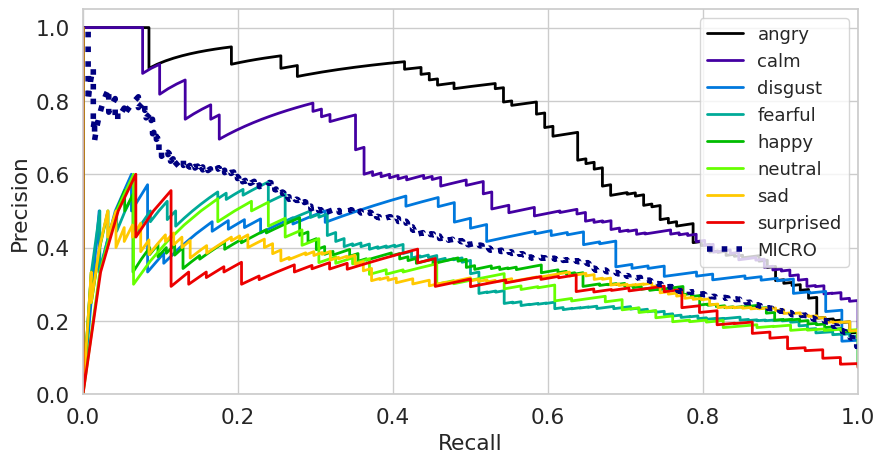

In [51]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("LGBM_Precision_Recall.svg", format="svg")
files.download("LGBM_Precision_Recall.svg")

In [52]:
predict_proba_dist = clf.predict_proba(X_test)

In [53]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [54]:
pred_probability = []
for eachArr in predict_proba_dist:
    pred_probability.append(softmax(eachArr))

In [55]:
print('ROC-AUC %s' % roc_auc_score(y_test, pred_probability, multi_class="ovr"))

ROC-AUC 0.7876336644220916


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

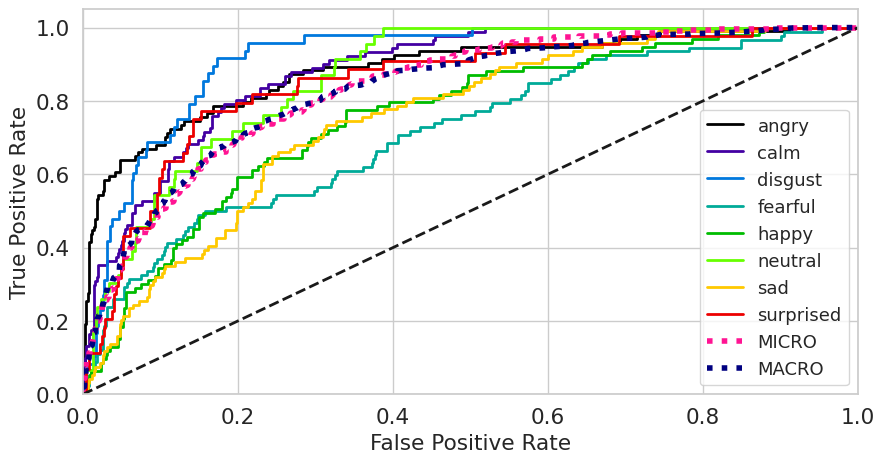

In [56]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("LGBM_ROC.svg", format="svg")
files.download("LGBM_ROC.svg")

In [57]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.2 MB/s eta 0:00:00


In [58]:
from catboost import CatBoostClassifier

In [59]:
clf = CatBoostClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Learning rate set to 0.081484
0:	learn: 2.0385682	total: 339ms	remaining: 5m 38s
1:	learn: 1.9985034	total: 649ms	remaining: 5m 23s
2:	learn: 1.9621473	total: 960ms	remaining: 5m 19s
3:	learn: 1.9290666	total: 1.16s	remaining: 4m 48s
4:	learn: 1.8952786	total: 1.36s	remaining: 4m 31s
5:	learn: 1.8647990	total: 1.5s	remaining: 4m 7s
6:	learn: 1.8406290	total: 1.63s	remaining: 3m 50s
7:	learn: 1.8141030	total: 1.77s	remaining: 3m 39s
8:	learn: 1.7876233	total: 1.9s	remaining: 3m 29s
9:	learn: 1.7637011	total: 2.07s	remaining: 3m 25s
10:	learn: 1.7380183	total: 2.3s	remaining: 3m 26s
11:	learn: 1.7119310	total: 2.46s	remaining: 3m 22s
12:	learn: 1.6923207	total: 2.6s	remaining: 3m 17s
13:	learn: 1.6696981	total: 2.72s	remaining: 3m 11s
14:	learn: 1.6472258	total: 2.86s	remaining: 3m 8s
15:	learn: 1.6284388	total: 2.99s	remaining: 3m 4s
16:	learn: 1.6166445	total: 3.12s	remaining: 3m
17:	learn: 1.6024316	total: 3.26s	remaining: 2m 58s
18:	learn: 1.5845600	total: 3.4s	remaining: 2m 55s
19:	

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

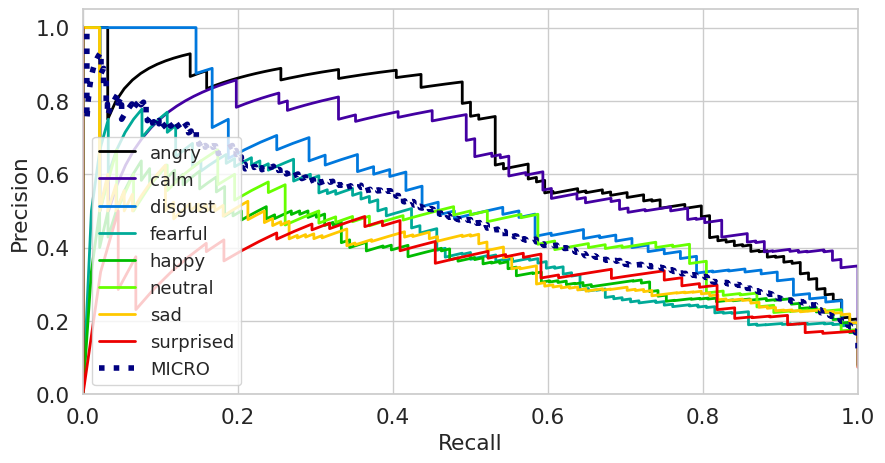

In [60]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("CatBoost_Precision_Recall.svg", format="svg")
files.download("CatBoost_Precision_Recall.svg")

In [61]:
predict_proba_dist = clf.predict_proba(X_test)

In [62]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [63]:
pred_probability = []
for eachArr in predict_proba_dist:
    pred_probability.append(softmax(eachArr))

In [64]:
print('ROC-AUC %s' % roc_auc_score(y_test, pred_probability, multi_class="ovr"))

ROC-AUC 0.8514466781437482


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

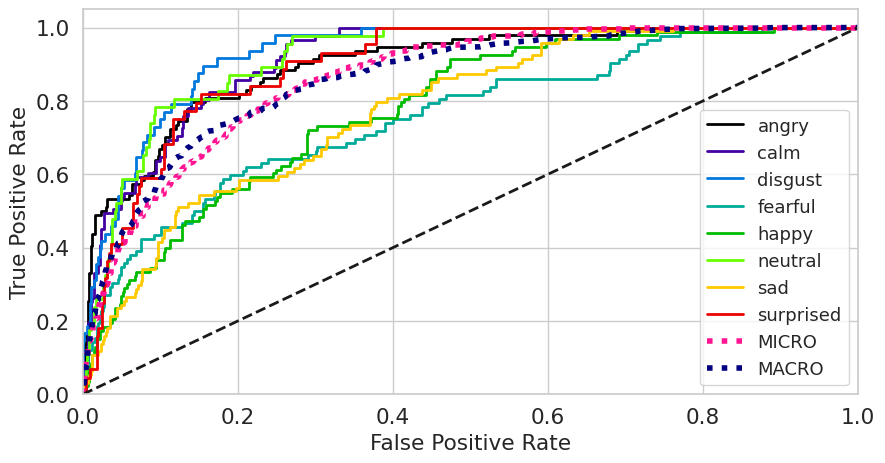

In [65]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test, 
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("CatBoost_ROC.svg", format="svg")
files.download("CatBoost_ROC.svg")

Lascio questo codice del bagging per copiarlo dopo e fare gli stessi esperimenti